In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


In [4]:
df = pd.read_csv('ENB2012_data.csv')

In [5]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


 X1 - Độ nhỏ gọn 
 
 X2 - Diện tích bề mặt
 
 X3 - Diện tích tường
 
 X4 - Khu vực mái nhà
 
 X5 - Chiều cao tổng thể
 
 X6 - Hướng nhà
 
 X7 - Khu vực dán kính
 
 X8 - Phân bố khu vực dán kính
 
 y1 - Mức độ thu nhiệt
 
 y2 - Mức độ tỏa nhiệt

In [7]:
df.columns = ['Relative_Compactness', 
              'Surface_Area', 
              'Wall_Area', 
              'Roof_Area', 
              'Overall_Height', 
              'Orientation', 
              'Glazing_Area', 
              'Glazing_Area_Distribution', 
              'Heating_Load', 
              'Cooling_Load']


# Descriptive Statistics

In [8]:
import statsmodels.api as sm

X = df.drop(columns = ['Heating_Load','Cooling_Load'])
y1 = df['Heating_Load']
X = sm.add_constant(X) 

model_y1 = sm.OLS(y1, X).fit()
print(model_y1.summary())  


                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:23:01   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [9]:
import statsmodels.api as sm

X = df.drop(columns = ['Heating_Load','Cooling_Load'])
y2 = df['Cooling_Load']
X = sm.add_constant(X) 

model_y2 = sm.OLS(y2, X).fit()

print(model_y1.summary())  


                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:23:01   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [10]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


##### Variance

In [11]:
df.var()

Relative_Compactness            0.011189
Surface_Area                 7759.163842
Wall_Area                    1903.269883
Roof_Area                    2039.963060
Overall_Height                  3.066493
Orientation                     1.251630
Glazing_Area                    0.017748
Glazing_Area_Distribution       2.405476
Heating_Load                  101.812050
Cooling_Load                   90.502983
dtype: float64

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load

##### Range

In [12]:
range_heating_load = df['Heating_Load'].max() - df['Heating_Load'].min()
range_heating_load

37.09

In [13]:
range_cooling_load = df['Cooling_Load'].max() - df['Cooling_Load'].min()
range_cooling_load

37.13

# Visualization

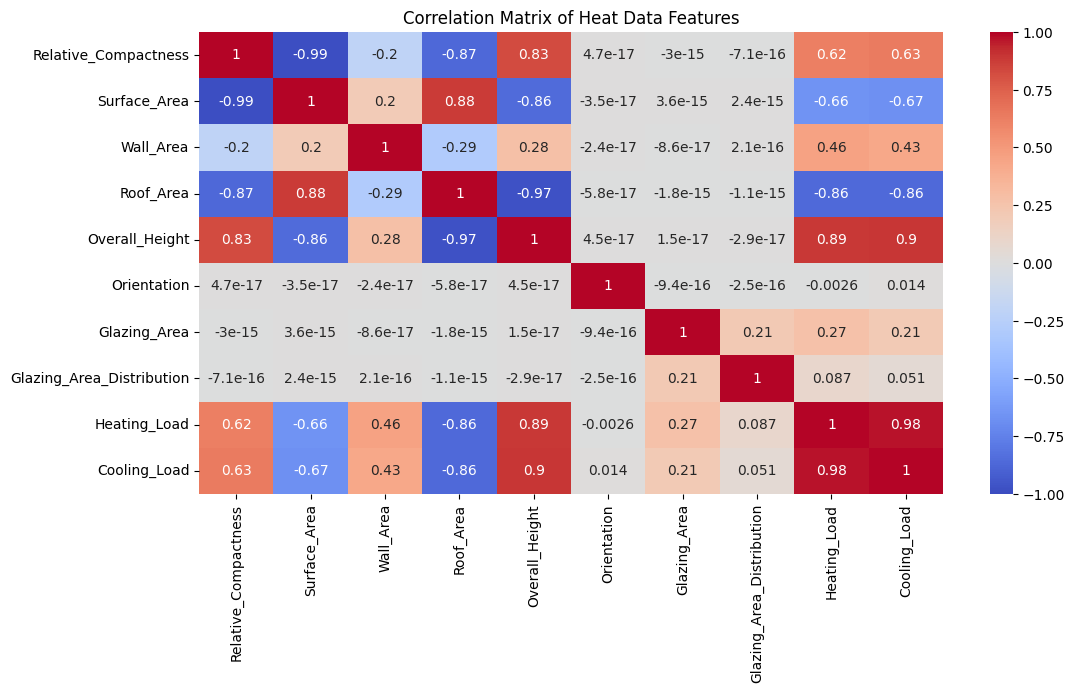

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Heat Data Features')
plt.show()


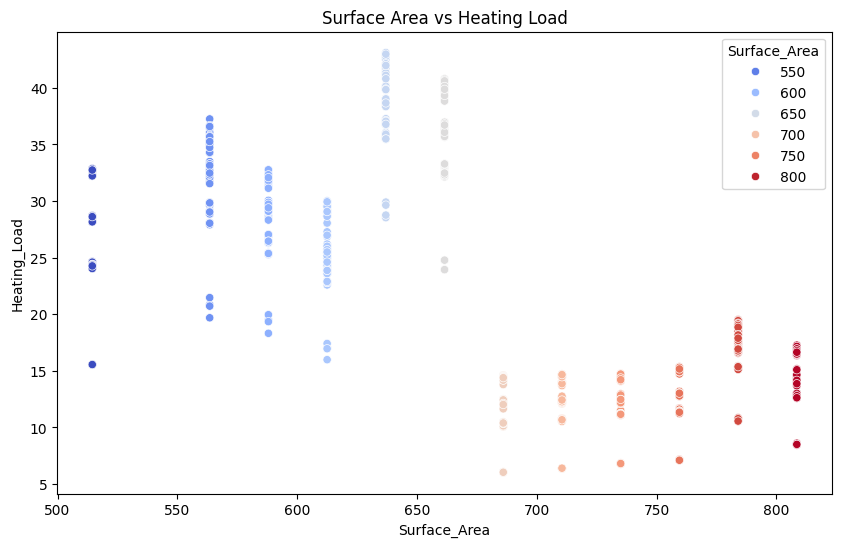

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Surface_Area', y='Heating_Load',hue = 'Surface_Area' ,palette='coolwarm')
plt.title('Surface Area vs Heating Load')
plt.show()


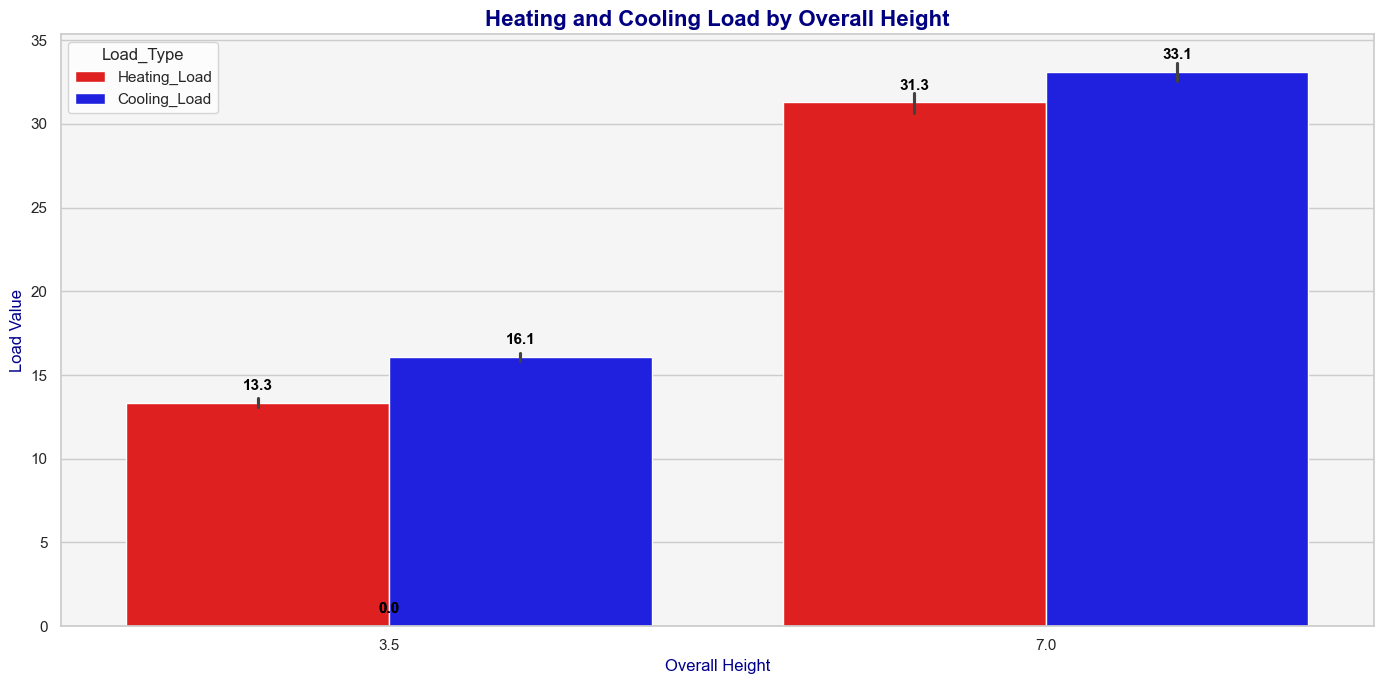

In [16]:
df_melted = df.melt(id_vars='Overall_Height', 
                    value_vars=['Heating_Load', 'Cooling_Load'], 
                    var_name='Load_Type', 
                    value_name='Load_Value')

plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

bar_plot = sns.barplot(x='Overall_Height', y='Load_Value', data=df_melted, 
                       hue='Load_Type', palette=['red', 'blue'])

for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.1f'), 
                      (bar.get_x() + bar.get_width() / 2, bar.get_height() + 1), 
                      ha='center', va='center', size=11, fontweight='bold', color='black')

plt.title('Heating and Cooling Load by Overall Height', weight='bold', fontsize=16, color='navy')
plt.xlabel('Overall Height', fontsize=12, color='darkblue')
plt.ylabel('Load Value', fontsize=12, color='darkblue')
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()


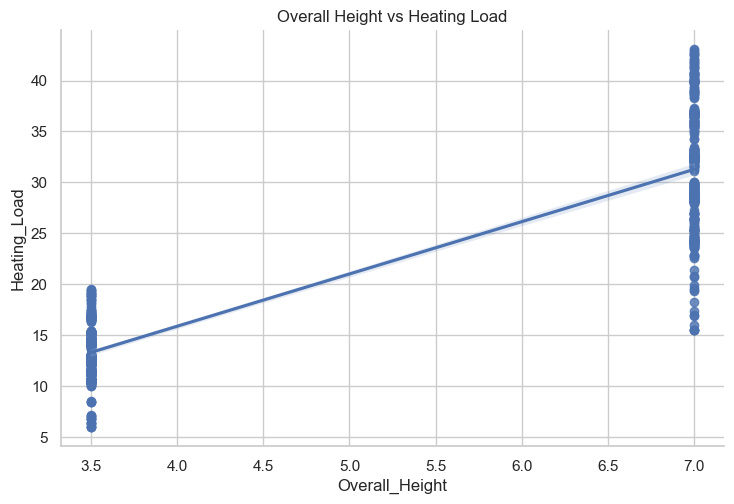

In [17]:
sns.lmplot(data=df, x='Overall_Height', y='Heating_Load', aspect=1.5)
plt.title("Overall Height vs Heating Load")
plt.show()


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print("Explained variance by each component:", pca.explained_variance_ratio_)


Explained variance by each component: [0.80703243 0.19263952]


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y1) 

feature_importances = rf.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"{name}: {importance:.4f}")


const: 0.0000
Relative_Compactness: 0.0924
Surface_Area: 0.3211
Wall_Area: 0.0348
Roof_Area: 0.3418
Overall_Height: 0.1194
Orientation: 0.0007
Glazing_Area: 0.0770
Glazing_Area_Distribution: 0.0127


# Model

In [20]:
### Data preparation

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Heating_Load','Cooling_Load'])
y1 = df['Heating_Load'] 
y2 = df['Cooling_Load']  

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)


In [22]:
### Multiple Linear Regression

In [23]:
model_lr_y1 = LinearRegression()
model_lr_y1.fit(X_train, y1_train)
y1_pred_lr = model_lr_y1.predict(X_test)

print("Linear Regression - Heating Load")
print("MSE:", mean_squared_error(y1_test, y1_pred_lr))
print("R2 Score:", r2_score(y1_test, y1_pred_lr))

model_lr_y2 = LinearRegression()
model_lr_y2.fit(X_train, y2_train)
y2_pred_lr = model_lr_y2.predict(X_test)

print("\nLinear Regression - Cooling Load")
print("MSE:", mean_squared_error(y2_test, y2_pred_lr))
print("R2 Score:", r2_score(y2_test, y2_pred_lr))


Linear Regression - Heating Load
MSE: 9.153281026191763
R2 Score: 0.9121832012699773

Linear Regression - Cooling Load
MSE: 9.89390935225445
R2 Score: 0.8932203280837449


In [24]:
### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

def categorize_load(y, thresholds):
    categories = np.digitize(y, bins=thresholds)
    return categories

heating_thresholds = [15, 30]  
cooling_thresholds = [15, 30]

model_rf_y1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_y1.fit(X_train, y1_train)
y1_pred_rf = model_rf_y1.predict(X_test)

print("\nRandom Forest - Heating Load")
print("MSE:", mean_squared_error(y1_test, y1_pred_rf))
print("R2 Score:", r2_score(y1_test, y1_pred_rf))

y1_test_cat = categorize_load(y1_test, heating_thresholds)
y1_pred_rf_cat = categorize_load(y1_pred_rf, heating_thresholds)

print("Accuracy:", accuracy_score(y1_test_cat, y1_pred_rf_cat))
print("Classification Report:\n", classification_report(y1_test_cat, y1_pred_rf_cat))

model_rf_y2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_y2.fit(X_train, y2_train)
y2_pred_rf = model_rf_y2.predict(X_test)

print("\nRandom Forest - Cooling Load")
print("MSE:", mean_squared_error(y2_test, y2_pred_rf))
print("R2 Score:", r2_score(y2_test, y2_pred_rf))

y2_test_cat = categorize_load(y2_test, cooling_thresholds)
y2_pred_rf_cat = categorize_load(y2_pred_rf, cooling_thresholds)

print("Accuracy:", accuracy_score(y2_test_cat, y2_pred_rf_cat))
print("Classification Report:\n", classification_report(y2_test_cat, y2_pred_rf_cat))



Random Forest - Heating Load
MSE: 0.24088222909090704
R2 Score: 0.9976889700896121
Accuracy: 0.9935064935064936
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        43

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154


Random Forest - Cooling Load
MSE: 2.9340964745454556
R2 Score: 0.9683338660414131
Accuracy: 0.8831168831168831
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.88      0.86      0.87        69
           2       0.86      0.91      0.88        55

    accuracy                           0.88       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0

In [26]:
### SVR

In [27]:
from sklearn.svm import SVR

model_svr_y1 = SVR(kernel='rbf', C=100, gamma=0.1)
model_svr_y1.fit(X_train, y1_train)
y1_pred_svr = model_svr_y1.predict(X_test)

print("\nSupport Vector Regressor - Heating Load")
print("MSE:", mean_squared_error(y1_test, y1_pred_svr))
print("R2 Score:", r2_score(y1_test, y1_pred_svr))

model_svr_y2 = SVR(kernel='rbf', C=100, gamma=0.1)
model_svr_y2.fit(X_train, y2_train)
y2_pred_svr = model_svr_y2.predict(X_test)

print("\nSupport Vector Regressor - Cooling Load")
print("MSE:", mean_squared_error(y2_test, y2_pred_svr))
print("R2 Score:", r2_score(y2_test, y2_pred_svr))



Support Vector Regressor - Heating Load
MSE: 0.5661260040756174
R2 Score: 0.9945685734750761

Support Vector Regressor - Cooling Load
MSE: 1.7813879916685058
R2 Score: 0.9807744321750252
